In [1]:
import pyaudio
import numpy as np
from IPython.display import clear_output
from w_model import AModel, feature_exctractor

In [ ]:
CHUNK = 4096 # number of data points to read at a time
RATE = 44100 # time resolution of the recording device (Hz)
#DEVICE = 0 # default
 
p = pyaudio.PyAudio()
model = AModel()
 
stream=p.open(format=pyaudio.paInt32,
              channels=2,
              rate=RATE,
              input=True,
              frames_per_buffer=CHUNK)

to_plot = []
 
while True:
    indata = np.fromstring(stream.read(CHUNK),dtype=np.int32)
 
    # Take the fft and square each value
    fftData=abs(np.fft.rfft(indata))**2

    to_plot.append(np.std(fftData))
    which = fftData[1:].argmax() + 1
    
    if which < 8:
        pass
    else:
        try:
            to_predict = feature_exctractor(np.log(fftData[1:]))
            res = model.dpredict(to_predict)
            #clear_output()
            print(res)
        except:
            pass

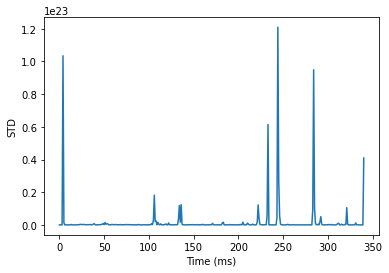

In [8]:
import matplotlib.pyplot as plt 

plt.xlabel('Time (ms)')
plt.ylabel('STD')
plt.plot(to_plot)